In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
cdfx = pd.read_csv("./catapult_mergesort_latency.csv", index_col=0)
vdfx = pd.read_csv("./vivado_mergesort.csv", index_col=0)
cdfx['throughput'] = vdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = vdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = vdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = vdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
cdfx['mem_partition_size'] = cdfx['knob_partition_factor']
vdfx['mem_partition_size'] = pd.to_numeric(vdfx['knob_no_size']/(vdfx['knob_partition_factor']), downcast='integer')
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_partition_factor'])
vdfx = vdfx.drop(columns=['knob_partition_factor'])

In [3]:
print(cdfx.count())
cdfx.head()

knob_no_size          11440
knob_outer_unroll     11440
knob_inner_unroll1    11440
knob_inner_unroll2    11440
knob_merge_unroll     11440
obj1                  11440
obj2                  11440
lut                   11440
ff                    11440
dsp                   11440
bram                  11440
throughput            11440
ff_inv                11440
lut_inv               11440
1/obj2                11440
clbUtil               11440
mem_partition_size    11440
dtype: int64


,knob_no_size,knob_outer_unroll,knob_inner_unroll1,knob_inner_unroll2,knob_merge_unroll,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size
n,,,,,,,,,,,,,,,,,
0,16,1,1,1,1,0.000017,231,1269,792,0,0,0.058824,0.001263,0.000788,0.008658,0.001563,1
1,16,1,1,1,1,0.000016,401,2092,1314,0,0,0.062500,0.000761,0.000478,0.004988,0.002713,2
2,16,1,1,1,1,0.000016,444,2748,1351,0,0,0.062500,0.000740,0.000364,0.004505,0.003004,4
3,16,1,1,1,1,0.000016,451,2940,1512,0,0,0.062500,0.000661,0.000340,0.004435,0.003052,8
4,16,1,1,1,1,0.000012,318,1845,1214,0,0,0.083333,0.000824,0.000542,0.006289,0.002152,16


In [4]:
print(vdfx.count())
vdfx.head()

knob_no_size          5527
knob_outer_unroll     5527
knob_inner_unroll1    5527
knob_inner_unroll2    5527
knob_merge_unroll     5527
obj1                  5527
obj2                  5527
lut                   5527
ff                    5527
dsp                   5527
bram                  5527
throughput            5527
ff_inv                5527
lut_inv               5527
1/obj2                5527
clbUtil               5527
mem_partition_size    5527
dtype: int64


,knob_no_size,knob_outer_unroll,knob_inner_unroll1,knob_inner_unroll2,knob_merge_unroll,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size
n,,,,,,,,,,,,,,,,,
0,16,1,1,1,1,0.000001,218,1199,834,3,0,1.0,0.001199,0.000834,0.009174,0.001475,4
1,16,1,1,1,1,0.000001,272,1506,840,3,0,1.0,0.001190,0.000664,0.007353,0.001841,2
2,16,1,1,1,1,0.000001,551,3019,1152,3,0,1.0,0.000868,0.000331,0.003630,0.003729,1
3,16,1,1,1,2,0.000002,292,1571,1029,3,0,0.5,0.000972,0.000637,0.006849,0.001976,4
4,16,1,1,1,2,0.000002,418,2232,1036,3,0,0.5,0.000965,0.000448,0.004785,0.002829,2


In [5]:
cmn_col = np.intersect1d(cdfx.columns, vdfx.columns)

Text(0, 0.5, 'CLB Resources (Normalized 1/CLB)')

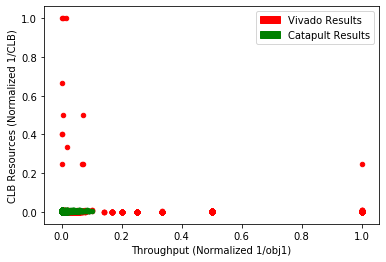

In [6]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')

Text(0, 0.5, 'Normalized 1/CLB (1/obj2)')

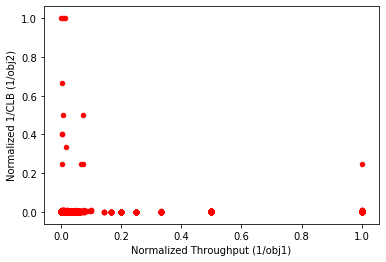

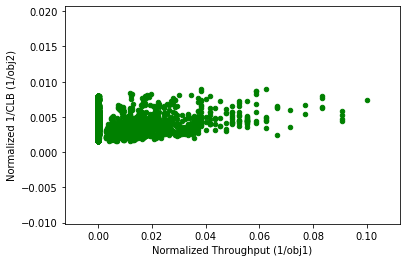

In [7]:
ax1 = vdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='r')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
ax = cdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='g')
#ax1.set_ylim(0,0.001)
#ax1.set_xlim(0,1)
#ax.set_ylim(0.2, 0.6)
#ax.set_xlim(0,0.0000004)
#red_data = mpatches.Patch(color='green', label='Vivado Results')
#green_data = mpatches.Patch(color='red', label='Catapult Results')
#plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')

In [8]:
print("~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~

knob_no_size          2777.986014
knob_outer_unroll        2.499650
knob_inner_unroll1       2.497028
knob_inner_unroll2       2.497028
knob_merge_unroll        2.501748
obj1                     4.156578
obj2                   667.191171
lut                   4093.307343
ff                    1401.404633
dsp                      0.000000
bram                     0.000000
throughput               0.001989
ff_inv                   0.000724
lut_inv                  0.000284
1/obj2                   0.003457
clbUtil                  0.004515
mem_partition_size     693.790734
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~

knob_no_size          2.735719e+03
knob_outer_unroll     2.376515e+00
knob_inner_unroll1    2.368193e+00
knob_inner_unroll2    2.496472e+00
knob_merge_unroll     2.383752e+00
obj1                  5.314688e-04
obj2                  3.135089e+03
lut                   1.776778e+

In [9]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_no_size','knob_outer_unroll','knob_inner_unroll1','knob_inner_unroll2','knob_merge_unroll','mem_partition_size'], how='inner')
cv_df.count()

knob_no_size          5489
knob_outer_unroll     5489
knob_inner_unroll1    5489
knob_inner_unroll2    5489
knob_merge_unroll     5489
obj1_x                5489
obj2_x                5489
lut_x                 5489
ff_x                  5489
dsp_x                 5489
bram_x                5489
throughput_x          5489
ff_inv_x              5489
lut_inv_x             5489
1/obj2_x              5489
clbUtil_x             5489
mem_partition_size    5489
obj1_y                5489
obj2_y                5489
lut_y                 5489
ff_y                  5489
dsp_y                 5489
bram_y                5489
throughput_y          5489
ff_inv_y              5489
lut_inv_y             5489
1/obj2_y              5489
clbUtil_y             5489
dtype: int64

(0, 1)

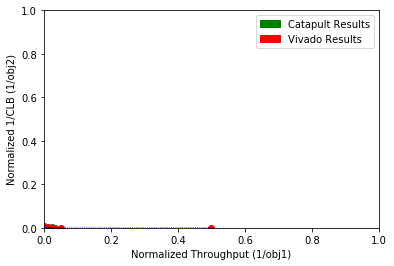

In [15]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

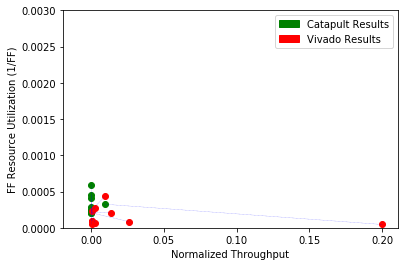

In [11]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)

In [12]:
df_sample = cv_df.sample(30)